### Decision Tree using Python

We will use Sklearn module to implement decision tree algorithm. 
Sklearn uses CART (classification and Regression trees) algorithm and by default it uses Gini impurity as a criteria to split the nodes.

There are other algorithms like ID3, C4.5, Chi-square etc. 

We will see the use of CART in following implementation.

In [1]:
# Importing necessory Libraries
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\Shankar\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
# Importing data and visualising random samples
data = pd.read_csv("winequality_red.csv")
data.sample(n=10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
918             8.4             0.360         0.32             2.2      0.081   
496             7.8             0.520         0.25             1.9      0.081   
41              8.8             0.610         0.30             2.8      0.088   
535             9.1             0.220         0.24             2.1      0.078   
1561            7.8             0.600         0.26             2.0      0.080   
1053            8.3             0.330         0.42             2.3      0.070   
1269            5.5             0.490         0.03             1.8      0.044   
1104            8.0             0.480         0.34             2.2      0.073   
9               7.5             0.500         0.36             6.1      0.071   
1498            6.6             0.895         0.04             2.3      0.068   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
918                  32.0                  79.0  0.99640  3.30       0.72   
496                  14.0                  38.0  0.99840  3.43       0.65   
41                   17.0                  46.0  0.99760  3.26       0.51   
535                   1.0                  28.0  0.99900  3.41       0.87   
1561                 31.0                 131.0  0.99622  3.21       0.52   
1053                  9.0                  20.0  0.99426  3.38       0.77   
1269                 28.0                  87.0  0.99080  3.50       0.82   
1104                 16.0                  25.0  0.99360  3.28       0.66   
9                    17.0                 102.0  0.99780  3.35       0.80   
1498                  7.0                  13.0  0.99582  3.53       0.58   

      alcohol  quality  
918      11.0        6  
496       9.0        6  
41        9.3        4  
535      10.3        6  
1561      9.9        5  
1053     12.7        7  
1269     14.0        8  
1104     12.4        6  
9        10.5        5  
1498     10.8        6

In [4]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

The data set consists following Input variables :
1 - fixed acidity  2 - volatile acidity  3 - citric acid  4 - residual sugar  5 - chlorides  6 - free sulfur dioxide

7 - total sulfur dioxide  8 - density  9 - pH   10 - sulphates   11 - alcohol

and the Output variable gives the quality of th wine based on the input variables: 

12 - quality (score between 3 and 8)

In [3]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

We can see there is no missing data in the columns. Great!!

In [6]:
X = data.drop(columns = 'quality')
y = data['quality']

In [34]:
# split data
from sklearn.model_selection import train_test_split,GridSearchCV

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 15)

In [35]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [8]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

Let's understand the above tree:

* the first value indicates the column and the condition on which the root node was selected and further will be splitted
* the second value gives the gini impurity of the selected node
* samples gives the number of observations at that point of time present in the node
* value within the square brackets represents number of observations present in each class(output) i.e. in the above given figure, 8 observations are in class 1, 38 in class 2 , 468 in class 3 and so on.

Then  the split was made on the basis of given condition.


In [37]:
clf.score(x_train,y_train)

1.0

In [38]:
py_pred = clf.predict(x_test)

In [39]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.5875

Now we haven't done any prerocessing with our data and neither done any hyper parameter tunings.Let's do all those and see how our score improves.

In [40]:
# Data normalization using standardscaler
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

Although our dataset is realtively small, let's use PCA for feature selection and see if it improves our accuracy.

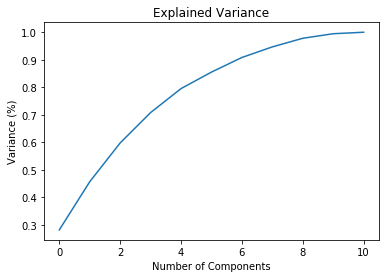

In [29]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
ax = plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

We can see that around 95% of the variance is being explained by 8 components.
So instead of giving all 11 columns as input in our algorithm let's use these 8 principal components instead.

In [30]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])

In [31]:
principal_x.head()

PC-1      PC-2      PC-3      PC-4      PC-5      PC-6      PC-7  \
0 -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   
1 -0.799170  1.856553 -0.911690  0.548066 -0.018392  0.929714 -1.009829   
2 -0.748479  0.882039 -1.171394  0.411021 -0.043531  0.401473 -0.539553   
3  2.357673 -0.269976  0.243489 -0.928450 -1.499149 -0.131017  0.344290   
4 -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   

       PC-8  
0 -0.282258  
1  0.762587  
2  0.597946  
3 -0.455375  
4 -0.282258

In [42]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 15)
#let's first visualize the tree on the data without doing any pre processing



0.5458333333333333

In [43]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
clf.score(x_train,y_train)

1.0

In [45]:
clf.score(x_test,y_test)

0.55625

Not much improvement..

Let's now try to tune some hyperparameters using the GridSearchCV algorithm.
We have studied about CrossValidation in upcoming lecture. 

GridSearchCV is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search.
It does a exhaustive generation of combination of different parameters passed.
Using cross validation score, Grid Search returns the combination of hyperparameters for which the model is performing the best. 

In [48]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [49]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [50]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [25]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 22, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [26]:
# check the best score using best_score_
grid_search.best_score_

0.5969330557335042

In [27]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=24, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [28]:
clf.score(x_test,y_test)

0.60625

Great!! Our test score has improved after using Gridsearch.

Note : we must understand that giving all the hyperparameters in the gridSearch doesn't gurantee the best result. We have to do hit and trial with parameters to get the perfect score.

You are welcome to try tweaking the parameters more and try an improve the accuracy more.
